In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../datasets/vgsales_clean.csv")

data.head()

,Nombre,Plataforma,Año,Género,Publicador,Ventas_Norteamérica,Ventas_Europa,Ventas_Japón,Ventas_Otros,Ventas_Globales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


------------------------ TOP JUEGOS MAS VENDIDOS -------------------------------
0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: Nombre, dtype: object



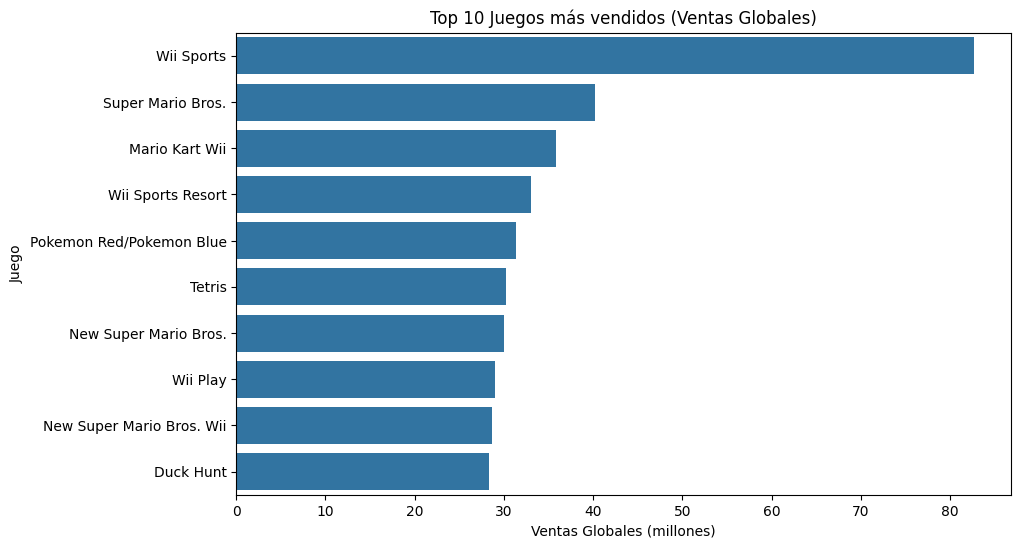

--------------------- DATOS DESCRIPTIVOS -------------------------
        Ventas_Globales  Ventas_Otros  Ventas_Japón  Ventas_Europa  \
mean           0.602397      0.051279      0.105630       0.158874   
median         0.170000      0.010000      0.000000       0.020000   
sum         6802.870000    579.090000   1192.880000    1794.160000   
var            3.246926      0.046655      0.134588       0.332125   
std            1.801923      0.215997      0.366862       0.576303   
kurt         487.694737    870.969942    140.357084     651.334851   

        Ventas_Norteamérica  
mean               0.286403  
median             0.070000  
sum             3234.350000  
var                0.894383  
std                0.945718  
kurt             526.564742  



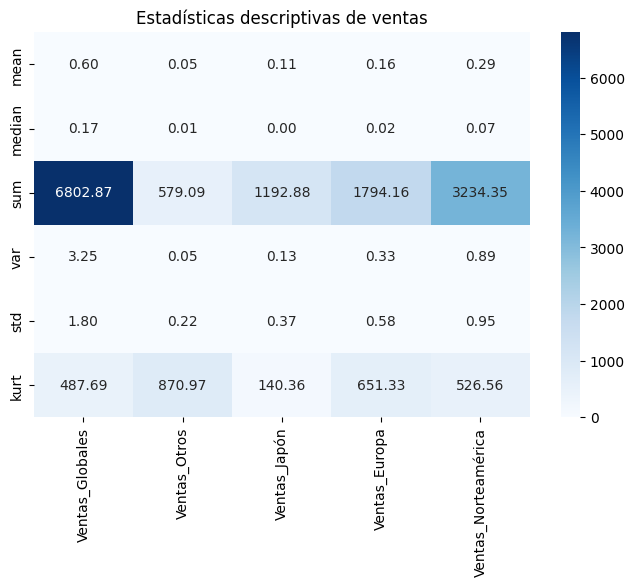

------------------------ TOTAL VENTAS POR GENERO -------------------------------
          Género  Ventas_Globales
0         Action          1133.88
10        Sports           938.76
7   Role-Playing           809.98
8        Shooter           708.01
4       Platform           704.76
3           Misc           644.34
6         Racing           588.66
2       Fighting           349.51
9     Simulation           346.63
5         Puzzle           218.94
1      Adventure           199.47
11      Strategy           159.93



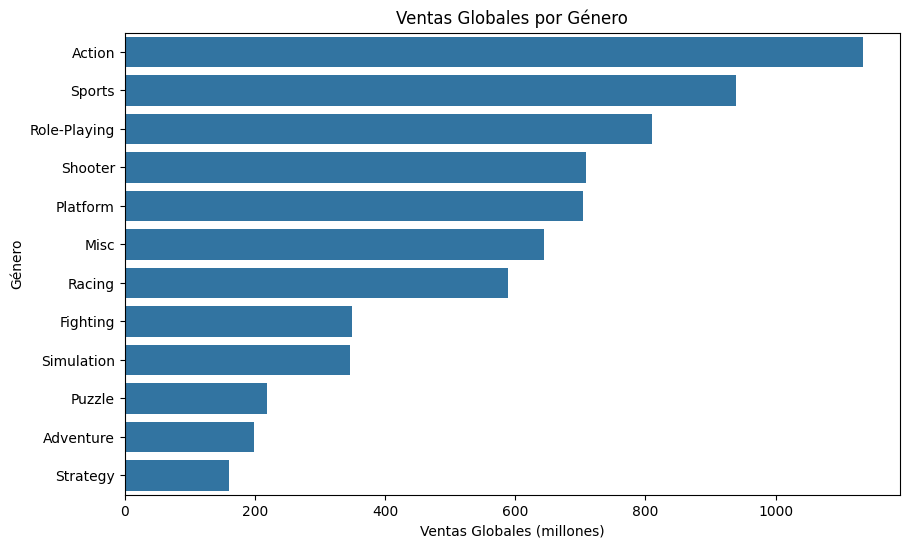

------------------------ TOTAL VENTAS POR AÑO -------------------------------
     Año  Ventas_Globales
0   1980            10.89
1   1981            31.18
2   1982            26.15
3   1983            15.66
4   1984            49.14
5   1985            53.53
6   1986            37.07
7   1987            21.27
8   1988            39.42
9   1989            67.73
10  1990            43.14
11  1991            31.50
12  1992            72.15
13  1993            45.76
14  1994            73.31
15  1995            82.66
16  1996           193.50
17  1997           192.94
18  1998           241.36
19  1999           230.21
20  2000           178.70
21  2001           296.01
22  2002           325.66
23  2003           274.08
24  2004           329.16
25  2005           376.56
26  2006           441.48
27  2007           453.05
28  2008           472.34
29  2009           483.44
30  2010           431.13
31  2011           342.38
32  2012           240.97
33  2013           217.10
34  2014    

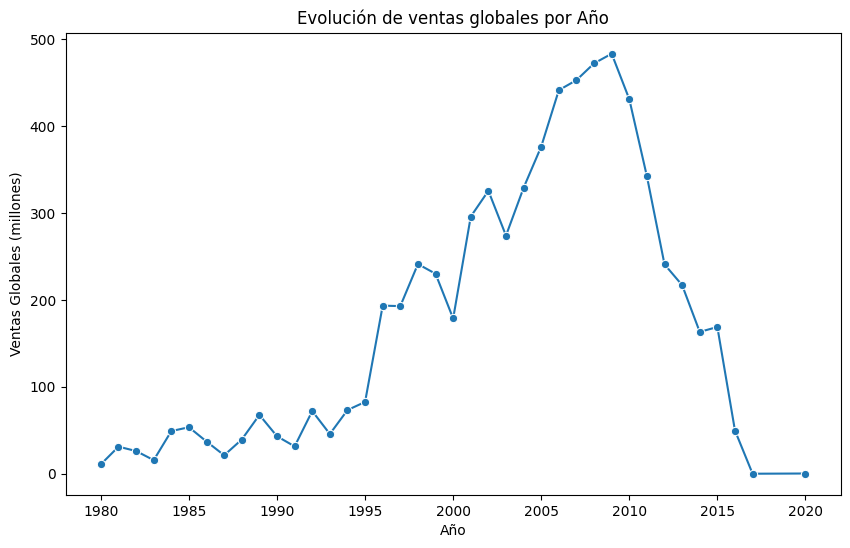

------------------------ TOP PUBLICADORES ----------------------------------
                    Publicador  Ventas_Globales  Porcentaje
0                     Nintendo          1705.87   25.075740
1              Electronic Arts           644.18    9.469239
2  Sony Computer Entertainment           575.39    8.458048
3                   Activision           396.45    5.827687
4                      Ubisoft           317.46    4.666560
5                        Otros          3163.52   46.502726



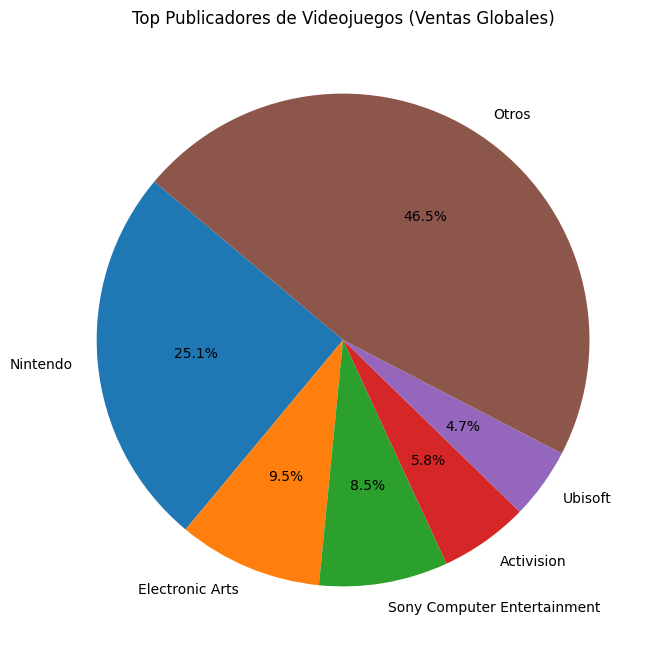

In [14]:
#------ PRACTICA 3 -------
# se agrego a las funciones hechas en la practica 2 sus graficas respectivas


def dat_descriptivos(df):
    """Obtiene datos descriptivos y los grafica como heatmap"""
    print("--------------------- DATOS DESCRIPTIVOS -------------------------")
    resumen = df[["Ventas_Globales", "Ventas_Otros", "Ventas_Japón",
                  "Ventas_Europa", "Ventas_Norteamérica"]].agg(
                    ["mean", "median", "sum", "var", "std", "kurt"])
    print(resumen)
    print()

    # mapa de calor de las estadísticas
    plt.figure(figsize=(8, 5))
    sns.heatmap(resumen, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Estadísticas descriptivas de ventas")
    plt.show()


def top_juegos_mas_vendidos(df):
    """Top 10 juegos más vendidos y gráfico de barras"""
    print("------------------------ TOP JUEGOS MAS VENDIDOS -------------------------------")
    #se agreago la columna ventas globales para crear la barra
    top10 = df.sort_values(by="Ventas_Globales", ascending=False).head(10)[["Nombre", "Ventas_Globales"]]
    print(top10["Nombre"])
    print()

    # grafico de barras horizontales
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top10, y="Nombre", x="Ventas_Globales")
    plt.title("Top 10 Juegos más vendidos (Ventas Globales)")
    plt.xlabel("Ventas Globales (millones)")
    plt.ylabel("Juego")
    plt.show()


def total_por_genero(df):
    """Suma total de ventas por género (gráfico de barras)"""
    print("------------------------ TOTAL VENTAS POR GENERO -------------------------------")
    tabla = df.pivot_table(
        values=["Ventas_Globales"],
        index="Género",
        aggfunc="sum").reset_index()
    tabla = tabla.sort_values(by="Ventas_Globales", ascending=False)
    print(tabla)
    print()

    # barras por género
    plt.figure(figsize=(10, 6))
    sns.barplot(data=tabla, x="Ventas_Globales", y="Género")
    plt.title("Ventas Globales por Género")
    plt.xlabel("Ventas Globales (millones)")
    plt.ylabel("Género")
    plt.show()


def total_por_anio(df):
    """Ventas globales totales por año (gráfico de línea temporal)"""
    print("------------------------ TOTAL VENTAS POR AÑO -------------------------------")
    tabla = df.pivot_table(
        values=["Ventas_Globales"],
        index="Año",
        aggfunc="sum").reset_index()
    print(tabla)
    print()

    # línea temporal
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=tabla, x="Año", y="Ventas_Globales", marker="o")
    plt.title("Evolución de ventas globales por Año")
    plt.xlabel("Año")
    plt.ylabel("Ventas Globales (millones)")
    plt.show()


def top_publicadores(df, n=5):
    """Top N publicadores + Otros, gráfico de pastel"""
    print("------------------------ TOP PUBLICADORES ----------------------------------")
    ventas_pub = df.groupby("Publicador")["Ventas_Globales"].sum().sort_values(ascending=False)
    top_n = ventas_pub.head(n)
    otros = ventas_pub.iloc[n:].sum()
    tabla = pd.concat([top_n, pd.Series({"Otros": otros})])
    tabla = tabla.reset_index()
    tabla.columns = ["Publicador", "Ventas_Globales"]
    total = tabla["Ventas_Globales"].sum()
    tabla["Porcentaje"] = (tabla["Ventas_Globales"] / total) * 100
    print(tabla)
    print()

    # gráfico de pastel
    plt.figure(figsize=(8, 8))
    plt.pie(tabla["Ventas_Globales"], labels=tabla["Publicador"], autopct="%1.1f%%", startangle=140)
    plt.title("Top Publicadores de Videojuegos (Ventas Globales)")
    plt.show()


# === USO ===
top_juegos_mas_vendidos(data)
dat_descriptivos(data)
total_por_genero(data)
total_por_anio(data)
top_publicadores(data)